In [1]:
import pandas as pd
import torch
from build_ftt_model import build_ftt_model
from model_building_tool import (
    ITER_FNS,
    EarlyStopper,
    acc_loss_recorder,
    apply_model,
    balance_splited_X_y_pos_neg,
    evaluate,
    load_json,
    set_loss_fn,
    set_optimizer,
    set_reduce_lr,
    set_SAM_optimizer,
    set_train_loader,
    transform_splited_data_to_tensor,
)
from model_evaluation import show_histroy
from x_y_data_preprocessing import sort_and_find_cat_col_X

In [2]:
X_path = "data/2019_join_data_WithLabel_pure_X.csv"
X_splited_json_path = (
    "splited_encoded_data/2019_join_data_WithLabel_pure_X_encoded_splited.json"
)
y_splited_json_path = (
    "splited_encoded_data/2019_join_data_WithLabel_pure_y_splited.json"
)
cardinalities_json_path = "splited_encoded_data/2019_join_data_WithLabel_pure_X_fill_nan_by_Unknown_cat_cardinalities.json"
class_weights_json = "data/2019_join_data_WithLabel_pure_y_class_weights.json"

In [3]:
X_splited = load_json(X_splited_json_path)
y_splited = load_json(y_splited_json_path)
cardinalities = load_json(cardinalities_json_path)
class_weights = load_json(class_weights_json)
cat_col = sort_and_find_cat_col_X(X_path)

In [5]:
# X_splited, y_splited = balance_splited_X_y_pos_neg(X_splited, y_splited)

pos: 741
 neg: 31287

under sample to balanced: 
pos: 741
 neg: 741



In [4]:
X_splited = transform_splited_data_to_tensor(X_splited)
y_splited = transform_splited_data_to_tensor(y_splited)

In [7]:
model = build_ftt_model(
    n_num_features=cat_col,
    d_token=32,  # must be multiple of 8
    n_blocks=2,
    attention_dropout=0.2,
    ffn_d_hidden=16,
    ffn_dropout=0.1,
    d_out=1,
    device="cpu",
    cardinalities=cardinalities,
)
# optimizer = set_optimizer(model)
optimizer = set_SAM_optimizer(model)
scheduler = set_reduce_lr(optimizer, mode="min", factor=0.1, patience=5, verbose=True)
loss_fn = set_loss_fn(task_type="binclass")
early_stopper = EarlyStopper(patience=10)
train_loader = set_train_loader(X_splited, batch_size=32)

In [ ]:
name = "sam"
n_epochs = 1000
batch_size = 32
report_frequency = len(X_splited["train"]) // batch_size // 5
min_loss = 100000
iter_type = "sam"
learning_curve_df = pd.DataFrame(columns=["acc", "val_acc", "loss", "val_loss"])
best_val_metrics = {}
best_test_metrics = {}

(epoch) 1 (batch) 0 (loss) 0.7956
(epoch) 1 (batch) 200 (loss) 0.3122
(epoch) 1 (batch) 400 (loss) 0.6012
(epoch) 1 (batch) 600 (loss) 0.7690
(epoch) 1 (batch) 800 (loss) 0.9464
(epoch) 1 (batch) 1000 (loss) 0.4625


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 001 | Train acc: 0.8812289246908954 | Train loss: 0.625444525567366 | Valid acc: 0.8861209964412812 | Valid loss: 0.6118531367248041
val_loss:0.6118531367248041 <<< BEST VALIDATION LOSS

(epoch) 2 (batch) 0 (loss) 0.4046
(epoch) 2 (batch) 200 (loss) 0.3509
(epoch) 2 (batch) 400 (loss) 1.1726
(epoch) 2 (batch) 600 (loss) 0.6935
(epoch) 2 (batch) 800 (loss) 0.3055
(epoch) 2 (batch) 1000 (loss) 1.0470


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 002 | Train acc: 0.7986449356812789 | Train loss: 0.6347856318532297 | Valid acc: 0.8076418805019666 | Valid loss: 0.6305790089181041
val_loss:0.6305790089181041
(epoch) 3 (batch) 0 (loss) 0.2816
(epoch) 3 (batch) 200 (loss) 0.2236
(epoch) 3 (batch) 400 (loss) 0.7041
(epoch) 3 (batch) 600 (loss) 0.3248
(epoch) 3 (batch) 800 (loss) 0.5217
(epoch) 3 (batch) 1000 (loss) 0.2155


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 003 | Train acc: 0.894248782315474 | Train loss: 0.6204753137191643 | Valid acc: 0.9001685708934257 | Valid loss: 0.6481452622391753
val_loss:0.6481452622391753
(epoch) 4 (batch) 0 (loss) 0.1919
(epoch) 4 (batch) 200 (loss) 0.6561
(epoch) 4 (batch) 400 (loss) 2.8859
(epoch) 4 (batch) 600 (loss) 0.6304
(epoch) 4 (batch) 800 (loss) 0.4879
(epoch) 4 (batch) 1000 (loss) 0.2185


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 004 | Train acc: 0.8854127638316474 | Train loss: 0.5523639760452724 | Valid acc: 0.8864955984266717 | Valid loss: 0.5409607582525504
val_loss:0.5409607582525504 <<< BEST VALIDATION LOSS

(epoch) 5 (batch) 0 (loss) 0.0796
(epoch) 5 (batch) 200 (loss) 0.4888
(epoch) 5 (batch) 400 (loss) 0.4848
(epoch) 5 (batch) 600 (loss) 0.2870
(epoch) 5 (batch) 800 (loss) 2.2243
(epoch) 5 (batch) 1000 (loss) 6.4409


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 005 | Train acc: 0.9036155863619333 | Train loss: 0.5705806256248752 | Valid acc: 0.9061622026596741 | Valid loss: 0.5724525651119134
val_loss:0.5724525651119134
(epoch) 6 (batch) 0 (loss) 0.4675
(epoch) 6 (batch) 200 (loss) 0.6465
(epoch) 6 (batch) 400 (loss) 0.3653
(epoch) 6 (batch) 600 (loss) 0.5082
(epoch) 6 (batch) 800 (loss) 0.6642
(epoch) 6 (batch) 1000 (loss) 0.7646


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 006 | Train acc: 0.8823529411764706 | Train loss: 0.5395493913459111 | Valid acc: 0.8863082974339764 | Valid loss: 0.5361702506362241
val_loss:0.5361702506362241 <<< BEST VALIDATION LOSS

(epoch) 7 (batch) 0 (loss) 0.3041
(epoch) 7 (batch) 200 (loss) 0.2165
(epoch) 7 (batch) 400 (loss) 0.2584
(epoch) 7 (batch) 600 (loss) 0.1660
(epoch) 7 (batch) 800 (loss) 0.3221
(epoch) 7 (batch) 1000 (loss) 0.3861


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 007 | Train acc: 0.843761708505058 | Train loss: 0.5502388448963544 | Valid acc: 0.8522195167634389 | Valid loss: 0.5352186781524674
val_loss:0.5352186781524674 <<< BEST VALIDATION LOSS

(epoch) 8 (batch) 0 (loss) 0.2470
(epoch) 8 (batch) 200 (loss) 0.3271
(epoch) 8 (batch) 400 (loss) 1.8870
(epoch) 8 (batch) 600 (loss) 0.1754
(epoch) 8 (batch) 800 (loss) 2.4630
(epoch) 8 (batch) 1000 (loss) 0.2630


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 008 | Train acc: 0.8786686649181966 | Train loss: 0.5306543705465494 | Valid acc: 0.8821876755946807 | Valid loss: 0.5260029730348132
val_loss:0.5260029730348132 <<< BEST VALIDATION LOSS

(epoch) 9 (batch) 0 (loss) 0.5554
(epoch) 9 (batch) 200 (loss) 0.1718
(epoch) 9 (batch) 400 (loss) 0.2131
(epoch) 9 (batch) 600 (loss) 0.3166
(epoch) 9 (batch) 800 (loss) 0.5534
(epoch) 9 (batch) 1000 (loss) 0.1882


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 009 | Train acc: 0.9120769326839016 | Train loss: 0.5399752030796038 | Valid acc: 0.916838359243304 | Valid loss: 0.5515386501892684
val_loss:0.5515386501892684
(epoch) 10 (batch) 0 (loss) 7.8690
(epoch) 10 (batch) 200 (loss) 0.3804
(epoch) 10 (batch) 400 (loss) 0.2805
(epoch) 10 (batch) 600 (loss) 0.3433
(epoch) 10 (batch) 800 (loss) 0.9067
(epoch) 10 (batch) 1000 (loss) 0.1969


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 010 | Train acc: 0.8897839390533283 | Train loss: 0.5339587825178669 | Valid acc: 0.8945495411125679 | Valid loss: 0.562859771874044
val_loss:0.562859771874044
(epoch) 11 (batch) 0 (loss) 0.4288
(epoch) 11 (batch) 200 (loss) 0.3545
(epoch) 11 (batch) 400 (loss) 0.4932
(epoch) 11 (batch) 600 (loss) 0.0708
(epoch) 11 (batch) 800 (loss) 0.2692
(epoch) 11 (batch) 1000 (loss) 0.3807


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 011 | Train acc: 0.8837891844635943 | Train loss: 0.5325656973185634 | Valid acc: 0.8855590934631954 | Valid loss: 0.5480240497917445
val_loss:0.5480240497917445
(epoch) 12 (batch) 0 (loss) 0.3103
(epoch) 12 (batch) 200 (loss) 0.3255
(epoch) 12 (batch) 400 (loss) 0.4002
(epoch) 12 (batch) 600 (loss) 0.6996
(epoch) 12 (batch) 800 (loss) 0.4914
(epoch) 12 (batch) 1000 (loss) 0.3393


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 012 | Train acc: 0.8765767453478207 | Train loss: 0.5431511402948974 | Valid acc: 0.8821876755946807 | Valid loss: 0.5453445998123911
val_loss:0.5453445998123911
(epoch) 13 (batch) 0 (loss) 0.4683
(epoch) 13 (batch) 200 (loss) 0.6527
(epoch) 13 (batch) 400 (loss) 0.4743
(epoch) 13 (batch) 600 (loss) 0.2447
(epoch) 13 (batch) 800 (loss) 0.2134
(epoch) 13 (batch) 1000 (loss) 0.3554


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 013 | Train acc: 0.8889097040089922 | Train loss: 0.519644489252003 | Valid acc: 0.8949241430979584 | Valid loss: 0.5340190829158298
val_loss:0.5340190829158298
(epoch) 14 (batch) 0 (loss) 0.3051
(epoch) 14 (batch) 200 (loss) 1.2929
(epoch) 14 (batch) 400 (loss) 0.3064
(epoch) 14 (batch) 600 (loss) 0.2963
(epoch) 14 (batch) 800 (loss) 0.1304
(epoch) 14 (batch) 1000 (loss) 0.5477


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 014 | Train acc: 0.8833208442612714 | Train loss: 0.5131416583055263 | Valid acc: 0.8902416182805769 | Valid loss: 0.5408885706105154
Epoch    14: reducing learning rate of group 0 to 1.0000e-04.
val_loss:0.5408885706105154
(epoch) 15 (batch) 0 (loss) 0.3452
(epoch) 15 (batch) 200 (loss) 0.5363
(epoch) 15 (batch) 400 (loss) 0.2877
(epoch) 15 (batch) 600 (loss) 0.3546
(epoch) 15 (batch) 800 (loss) 0.1963
(epoch) 15 (batch) 1000 (loss) 0.4858


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 015 | Train acc: 0.893312101910828 | Train loss: 0.5027820327404928 | Valid acc: 0.8992320659299494 | Valid loss: 0.5366094517984692
val_loss:0.5366094517984692
(epoch) 16 (batch) 0 (loss) 0.1780
(epoch) 16 (batch) 200 (loss) 0.1097
(epoch) 16 (batch) 400 (loss) 0.5553
(epoch) 16 (batch) 600 (loss) 0.2110
(epoch) 16 (batch) 800 (loss) 0.2895
(epoch) 16 (batch) 1000 (loss) 0.2209


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 016 | Train acc: 0.8880979143249657 | Train loss: 0.5017468531442608 | Valid acc: 0.8936130361490916 | Valid loss: 0.5302624272527622
val_loss:0.5302624272527622
(epoch) 17 (batch) 0 (loss) 0.2762
(epoch) 17 (batch) 200 (loss) 0.2164
(epoch) 17 (batch) 400 (loss) 0.3594
(epoch) 17 (batch) 600 (loss) 0.4661
(epoch) 17 (batch) 800 (loss) 0.1658
(epoch) 17 (batch) 1000 (loss) 0.2957


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 017 | Train acc: 0.8934682153116024 | Train loss: 0.498254169644496 | Valid acc: 0.8977336579883873 | Valid loss: 0.5308321296295148
val_loss:0.5308321296295148
(epoch) 18 (batch) 0 (loss) 0.2447
(epoch) 18 (batch) 200 (loss) 2.6887
(epoch) 18 (batch) 400 (loss) 0.8714
(epoch) 18 (batch) 600 (loss) 2.6242
(epoch) 18 (batch) 800 (loss) 0.3573
(epoch) 18 (batch) 1000 (loss) 0.2304


<ipython-input-8-cc5fae1257ec>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  learning_curve_df = learning_curve_df.append(acc_loss_df)


Epoch 018 | Train acc: 0.8926564256275759 | Train loss: 0.49695731292090134 | Valid acc: 0.8964225510395205 | Valid loss: 0.527556372900975
val_loss:0.527556372900975


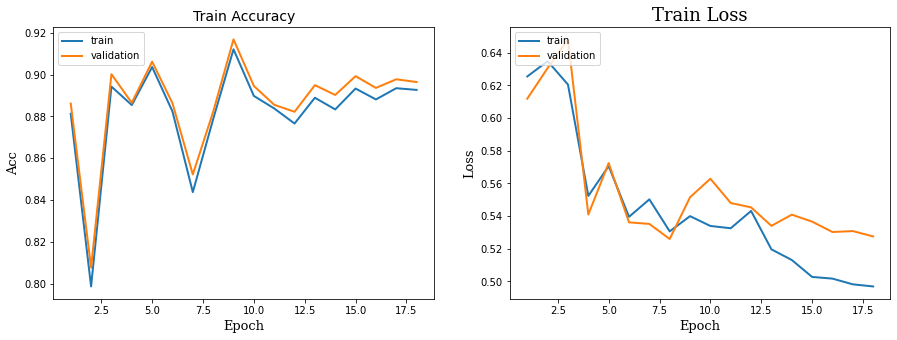

In [8]:
for epoch in range(1, n_epochs + 1):
    for iteration, batch_idx in enumerate(train_loader):
        model.train()
        optimizer.zero_grad()
        x_batch = X_splited["train"][batch_idx]
        y_batch = y_splited["train"][batch_idx]
        weight = torch.where(
            y_splited["train"][batch_idx] == 0, class_weights[0], class_weights[1]
        )  # weight

        loss, optimizer = ITER_FNS[iter_type](
            model, apply_model, x_batch, y_batch, optimizer, weight=weight
        )
        # loss=loss_fn(apply_model(inputs).squeeze(1), output)
        # loss.backward()
        # optimizer.step()
        if iteration % report_frequency == 0:
            print(f"(epoch) {epoch} (batch) {iteration} (loss) {loss.item():.4f}")

    acc_loss_df = acc_loss_recorder(
        model, X_splited, y_splited, loss_fn, epoch, cat_col, class_weights
    )
    learning_curve_df = learning_curve_df.append(acc_loss_df)

    print(
        f'Epoch {epoch:03d} | Train acc: {acc_loss_df["acc"].item()} | Train loss: {acc_loss_df["loss"].item()} | Valid acc: {acc_loss_df["val_acc"].item()} | Valid loss: {acc_loss_df["val_loss"].item()}'
    )
    val_loss = acc_loss_df["val_loss"].item()
    scheduler.step(val_loss)
    print(f"val_loss:{val_loss}", end="")
    if val_loss < min_loss:
        print(" <<< BEST VALIDATION LOSS")
        torch.save(model.state_dict(), "%s_best_model.pt" % name)
        min_loss = val_loss
        best_val_metrics = evaluate(model, X_splited, y_splited, "val", cat_col=12)
        best_test_metrics = evaluate(model, X_splited, y_splited, "test", cat_col=12)
    print()
    if early_stopper.early_stop(val_loss):
        show_histroy(
            learning_curve_df,
            train_acc="acc",
            validation_acc="val_acc",
            train_loss="loss",
            validation_loss="val_loss",
            path="",
        )
        break